<a href="https://colab.research.google.com/github/gabgmont/QuarentenaDados/blob/master/Aula%2002/Aula_02_anota%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aula 01** - Introdução



#Importando a biblioteca pandas para fazer a leitura dos dados.

In [0]:
import pandas as pd

#Lendo o arquivo .csv referente aos filmes listados no dataset e printando os 5 primeiros registros.


In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/gabgmont/QuarentenaDados/master/Aula%2001/ml-latest-small/movies.csv?token=AN2IIPEO57I6WJIXZC7AF7K6TYLOM")

In [383]:
filmes.head(15) #.head traz como padrão os 5 primeiros itens, mas pode ser especificado uma quantidade de elementos a serem exibidos.

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [0]:
filmes.columns = ["id_filme", "titulo", "generos"]

#Lendo o arquivo .csv referente às avaliações dos usuários, e printando os 5 primeiros registros.


In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/gabgmont/QuarentenaDados/master/Aula%2001/ml-latest-small/ratings.csv?token=AN2IIPEKLK2EILRZNSRQ5FS6TYLKW")

In [386]:
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Retornando o formato da tabela (100836 linhas, e 4 colunas).

In [387]:
avaliacoes.shape

(100836, 4)

#Alterando o nome das colunas.

In [388]:
avaliacoes.columns = ["id_usuario", "id_filme", "nota", "momento_avaliacao"]
avaliacoes.head()

,id_usuario,id_filme,nota,momento_avaliacao
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Buscando as avaliações referentes a um filme específico usando ".query()".

In [389]:
avaliacoes_filme2 = avaliacoes.query("id_filme == 2") #buscando todos os dados em que o id do filme é igual a 2.
avaliacoes_filme2.head()

,id_usuario,id_filme,nota,momento_avaliacao
560,6,2,4.0,845553522
1026,8,2,4.0,839463806
1773,18,2,3.0,1455617462
2275,19,2,3.0,965704331
2977,20,2,3.0,1054038313


Tendo as avaliações de um determinado cojunto, podemos "descrever" essas informações, trazendo algumas informações referentes a esses dados usando ".describe()":

In [390]:
avaliacoes_filme2.describe()
#soma
#media
#std
#minimo
#25%
#mediana
#75%
#max

,id_usuario,id_filme,nota,momento_avaliacao
count,110.000000,110.0,110.000000,1.100000e+02
mean,329.554545,2.0,3.431818,1.135805e+09
std,180.668513,0.0,0.881713,2.362198e+08
min,6.000000,2.0,0.500000,8.293223e+08
25%,171.000000,2.0,3.000000,8.939017e+08
50%,322.500000,2.0,3.500000,1.113762e+09
75%,481.500000,2.0,4.000000,1.347033e+09
max,608.000000,2.0,5.000000,1.529902e+09


Também é possível buscar somente uma estatística específica que estamos buscando, como por exemplo a média.

In [391]:
avaliacoes_filme2.mean()
#avaliacoes_filme2.std()

id_usuario           3.295545e+02
id_filme             2.000000e+00
nota                 3.431818e+00
momento_avaliacao    1.135805e+09
dtype: float64

#Calculando apenas a média da nota de cada filme
Buscando apenas a coluna de notas da tabela de avaliações (mantendo o index de cada nota):

In [392]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Agora extraindo a média entre todas as notas:

In [393]:
avaliacoes["nota"].mean()

3.501556983616962

Esta é a média entre todos os filmes. Para buscar a média por filme é preciso agrupa-los usando algum dos indicadores, no caso "id_filme", usando o método "groupby()", e passando como parâmetro o índice que será usado para agrupar os elementos.

In [394]:
media_por_filme = avaliacoes.groupby("id_filme")["nota"].mean()
media_por_filme.head()

id_filme
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

#Agora será necessário unir o nome dos filmes com a média de cada um.
Para fazer isso é preciso unir os dois dataframes, o de filmes, e o de medias por filme, o que pode ser feito criando um novo dataframe, e usanod o comando ".join()" para unir os filmes com as médias.

In [395]:
filmes.head()

,id_filme,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [396]:
media_por_filme.head()

id_filme
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [397]:
filme_com_media = filmes.join(media_por_filme, on = "id_filme")
filme_com_media.head()

,id_filme,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Após juntar as tabelas, é possível ordena-las usando qualquer um dos índices pelo método "sort_values". No momento ela está ordenada pelo ID do filme, mas podemos ordena-la pela média para vermos quais os filmes com a maior média.

In [398]:
filme_com_media.sort_values("nota", ascending = False).head(10)

,id_filme,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


#Podemos também gerar gráficos com essas informações para visualizar de uma maneira geral a distribuição das notas por exemplo.
O prórpio pandas possui uma maneira de exibir um gráfico pelo método ".plot()", assim não é necessário importar nenhuma biblioteca para visualizar o grafico, apenas para edita-lo e deixa-lo mais bonito.

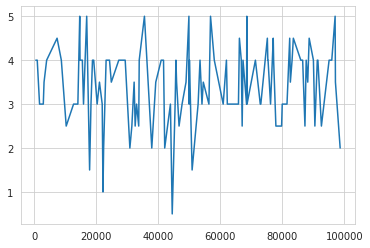

In [399]:
avaliacoes.query("id_filme == 2")["nota"].plot() #separando todas as notas em que o id do fimle é 2 e plotando no gráfico.

Como o gráfico de linhas não é o ideal para esse tipo de dado, seria mais interessante saber quantas notas X temos, e não como as notas variam em função do id do usuário. 
Portanto podemos alterar o estilo do gráfico adicionando o parâmetro "kind" no método ".plot()".


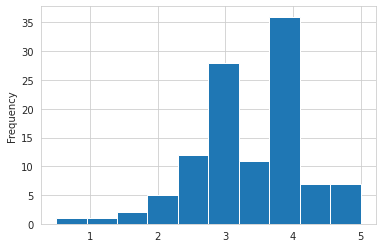

In [400]:
avaliacoes.query("id_filme == 2")["nota"].plot(kind = 'hist') # mudando o gráfico de linhas padrão para um histográfico.

Também é possível adicionar um título ao gráfico colocando o parâmetro "title" no método ".plot()".

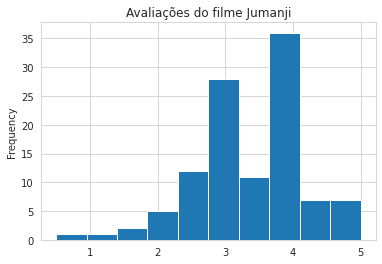

In [401]:
jumanji_graf = avaliacoes.query("id_filme == 2")["nota"].plot(kind = 'hist', title = 'Avaliações do filme Jumanji')

#Para podermos manipular melhor os gráficos, existe uma biblioteca chamada matplotlib.
Ela permite fazer alterações mais complexas do que apenas a biblioteca pandas permite.

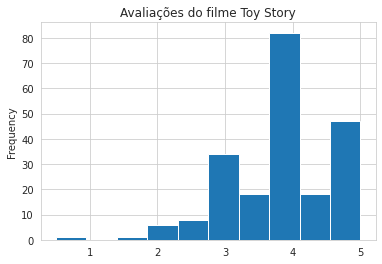

In [402]:
import matplotlib.pyplot as plt

avaliacoes.query("id_filme == 1")["nota"].plot(kind = 'hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

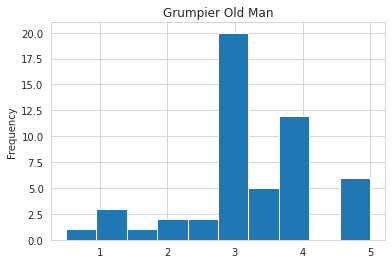

In [403]:
avaliacoes.query("id_filme == 3")["nota"].plot(kind = 'hist', title = "Grumpier Old Man")

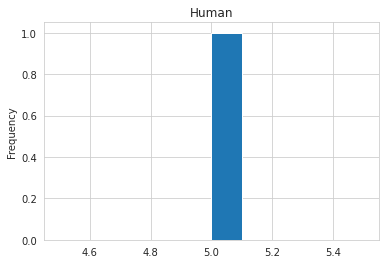

In [404]:
avaliacoes.query("id_filme == 143511")["nota"].plot(kind = 'hist', title = "Human")

##Desafios da Aula 01
Desafio 1: Determine quantos filmes não tem avaliações e quais são esses filmes.

In [405]:
filme_com_media["nota"].isnull().value_counts()

False    9724
True       18
Name: nota, dtype: int64

In [406]:
filme_sem_media = filme_com_media['nota'].isnull()
filme_com_media[filme_sem_media]

,id_filme,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


Desafio 2: Mudar o nome da coluna "nota" para "Média" no Dataframe de filme com média.

In [407]:
filme_com_media.columns = ["id_filme", "titulo", "genero", "nota_media"]
filme_com_media

,id_filme,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


Desafio 3: Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [408]:
num_av_filme = avaliacoes.groupby("id_filme")["nota"].count()
num_av_filme

id_filme
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [409]:
filme_com_qtd_avaliacao = filmes.join(num_av_filme, on='id_filme')
filme_com_qtd_avaliacao.columns = ["id_filme", "titulo", "genero", "qtd_notas"]
filme_com_qtd_avaliacao

,id_filme,titulo,genero,qtd_notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0
9739,193585,Flint (2017),Drama,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1.0


Desafio 4: Arredondar as médias (coluna de nota média) para duas casas decimais.

In [428]:
filme_com_media_aprox = filmes.join(media_por_filme, on = "id_filme")
filme_com_media_aprox.nota = filme_com_media_aprox.nota.round(2)
filme_com_media_aprox


,id_filme,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


Desafios 5 e 6: 

-Descobrir os generos dos filmes (quais são eles, únicos).

-Contar o número de aparições de cada genero.


In [411]:
#Maneira de fazer sem utilizar a biblioteca Pandas

generos_distintos = []

for generos in filmes['generos'].str.split('|'):
  for genero in generos:
    if genero not in generos_distintos:
      generos_distintos.append(genero)

generos_distintos

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [412]:
#Obtendo de forma manual a quantidade de filmes em cada genero, através de um contador

qtd_generos = {genero : 0 for genero in generos_distintos}

for generos in filmes['generos'].str.split('|'):
  for genero in generos:
    qtd_generos[genero] = qtd_generos[genero] + 1

qtd_generos

{'(no genres listed)': 34,
 'Action': 1828,
 'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Crime': 1199,
 'Documentary': 440,
 'Drama': 4361,
 'Fantasy': 779,
 'Film-Noir': 87,
 'Horror': 978,
 'IMAX': 158,
 'Musical': 334,
 'Mystery': 573,
 'Romance': 1596,
 'Sci-Fi': 980,
 'Thriller': 1894,
 'War': 382,
 'Western': 167}

In [413]:
#Forma de retornar cada generos utilizando a função "get_dummies".
#Ela separa a string no parametro dado (no caso, "|"), e determina cada item diferente como uma coluna no Dataframe gerado 
filmes['generos'].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [414]:
# Então é possível somar quantas vezes a função obteve o retorno "True", para cada genero destacado no metodo "get_dummies"

qtd_generos2 = filmes['generos'].str.get_dummies('|').sum()
qtd_generos2

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Desafio 7: Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.


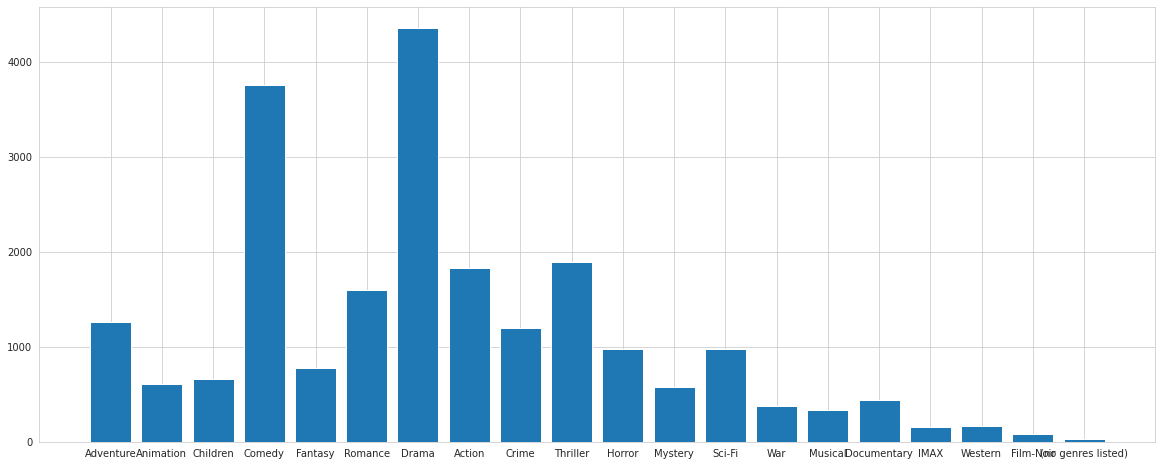

In [415]:
#Para o primeiro método:
    #from operator import itemgetter
    #for3 item in sorted(qtd_generos, key = qtd_generos.get):
    #    print (qtd_generos[item])

plt.figure(figsize=(20,8))
plt.bar(qtd_generos.keys(), qtd_generos.values())
plt.show()

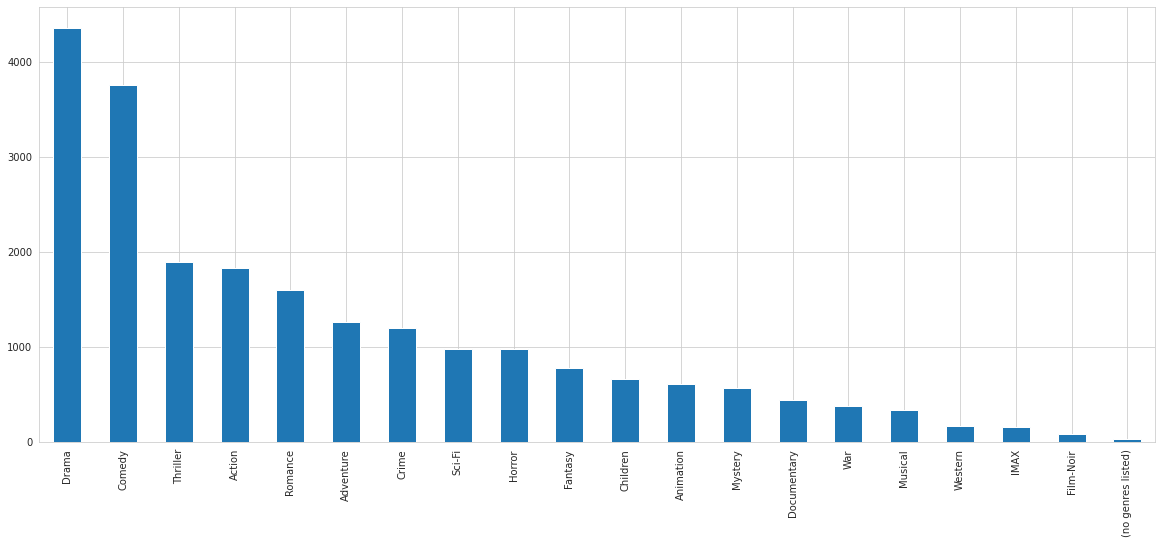

In [416]:
#Para o método 2

qtd_generos2 = filmes['generos'].str.get_dummies('|').sum().sort_values(ascending=False)
qtd_generos2.sort_values(ascending=False).plot(kind='bar', figsize = (20,8))

#**Aula 2** - Técnicas de centralidade e visualização de dados

###Utilizando os gráficos de generos de filmes criados nos desafios da aula 1:
O gráfico de pizza não é recomendado pois é dificil definir visualmente apenas qual é o maior genero. Entre Drama e comédia por exemplo, como ambos possuem areas parecidas visualmente, não é possível determinar qual é maior com facilidade.
Além de que, neste caso, a paleta de cores está limitada, então em certo ponto elas começam a se repetir

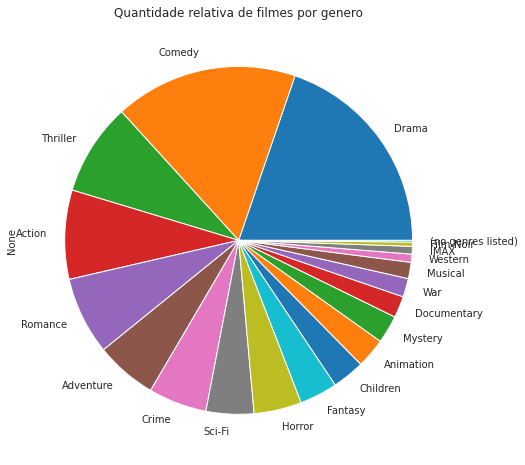

In [417]:
qtd_generos2.plot(
    kind='pie', 
    title = 'Quantidade relativa de filmes por genero',
    figsize = (20,8))
plt.show()

O tipo de gráfico recomendado para este tipo de análise seria o prórpio gráfico de barras, usado na resolução do desafio da aula 1. Já que a base dos retangulos é constante, precisamos apenas comparar as alturas, e isso facilita o processo e é possível definir com clareza qual genero está em maior quantidade.

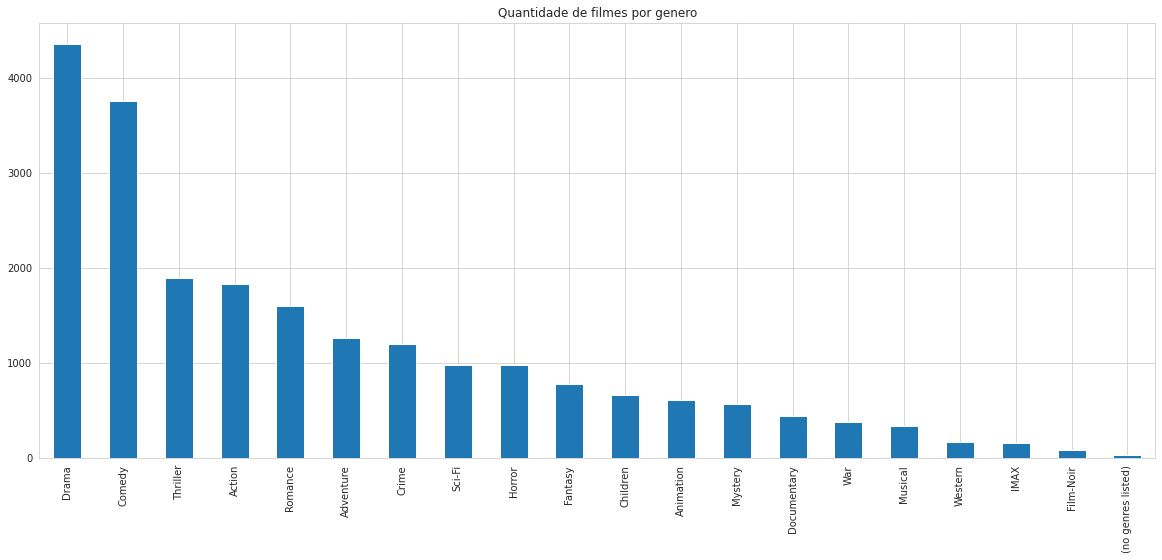

In [418]:
qtd_generos2.plot(
    kind='bar', 
    title = 'Quantidade de filmes por genero',
    figsize = (20,8))
plt.show()

Com o gráfico de barras, a diferença entre os gêneros fica mais evidente. Porém também é possível mapear melhor essa diferença, adicionando uma paleta de cores. Para este tipo de análise, uma boa forma de utiliza-las é como um efeito "fade", em que a cor fica mais potente, conforme o numero de filmes no genero cresce.
Para isso, será importada a biblioteca "seaborn".

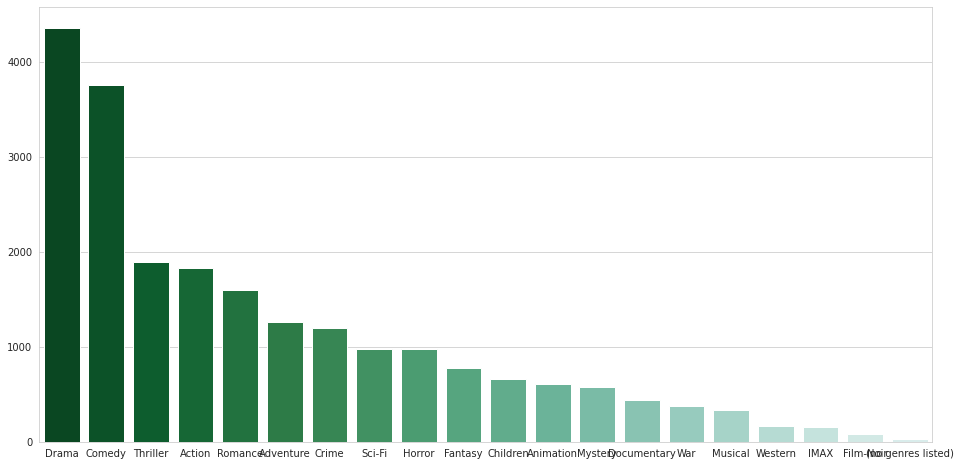

In [419]:
import seaborn as sns
sns.set_style('whitegrid') #Define linhas de auxilio no fundo para melhor visualização dos valores.

plt.figure(figsize=(16,8))
sns.barplot(
    x=qtd_generos2.index,
    y=qtd_generos2.values,
    palette=sns.color_palette("BuGn_r", n_colors=len(qtd_generos2) + 4)) 
plt.show()

#A paleta de cores está disponível na documentação da biblioteca seaborn, e cada uma possui um nome para ser informado como parametro.
#no caso, "BuGn_r".

#Caso também não seja definido um tamanho "n_colors=len(qtd_generos2) + 4)", 
#ele utilizará o tamanho padrão, então cores poderão ser repetidas. o "+4" é para o ultimo elemento não ficar totalmente transparente.

##Agora, como o gráfico está em um bom estágio para visualização, será feita a comparação das NOTAS dos filmes, e suas respectivas médias.

In [420]:
filme_com_media.head(10)

,id_filme,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
5,6,Heat (1995),Action|Crime|Thriller,3.946078
6,7,Sabrina (1995),Comedy|Romance,3.185185
7,8,Tom and Huck (1995),Adventure|Children,2.875000
8,9,Sudden Death (1995),Action,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212


As médias em si, dizem o valor médio da soma entre todas as notas. Mas não necessáriamente que dois filmes receberam as mesmas avaliações.
Por exemplo, dois filmes que tem médias parecidas podem ter recebido mais notas 5 ou 1, enquanto outro recebeu só notas 3. Dessa forma, apesar das médias serem as mesmas, como elas forma compostas pode significar coisas diferentes

In [0]:
#filmes.titulo.get(filmes.id_filme==1) test

3.4318181818181817


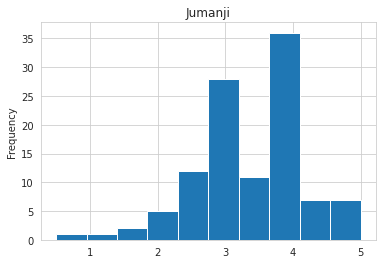

In [422]:
notas_do_filme_2 = avaliacoes.query("id_filme == 2")["nota"]
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind='hist', title = 'Jumanji')

3.2596153846153846


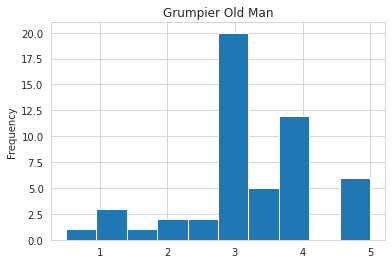

In [423]:
notas_do_filme_3 = avaliacoes.query("id_filme == 3")["nota"]
print(notas_do_filme_3.mean())
notas_do_filme_3.plot(kind='hist', title = 'Grumpier Old Man')

Os dois filmes, Jumanju e Grumpier Old Man, possuem médias parecidas. 3.43 e 3.26 respectivamente. Porém através dos gráficos é possível identificar que a distribuição de nota dos dois é bastante diferente.

Um exemplo citado na aula que retrata bem isso é o seguinte:

In [0]:
# Cidada A
populacao = 1000
salario = 1100
 
media = 1100
 
# Cidade B
populacao = 1000
salario1 = 1000000
salario999 = 100
 
media = (salario1 * 1 + salario999 * 999) / 1000
media = 1099.00

A média entre as duas cidades é praticamente a mesma, porém se olharmos apenas para a média, não conseguimos identificar o principal problema entre as duas.
Na cidade A, todos recebem o mesmo salário, equanto na cidade B, uma unica pessoa recebe um salário tão desproporcional as outras, que sobe a média geral.

Para aprofundar ainda mais, serão escolhidos dois filmes aleatórios em que as médias são parecidas, e que não possuem apenas um voto.

In [431]:
filme_com_media.sort_values('nota_media', ascending=False)[2450:2500]

,id_filme,titulo,genero,nota_media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


Para não ser necessário escrever todo o código quando quisermos visualizar um determinado filme, será criada uma função que receberá o id do filme como parâmetro, assim só precisamos nos preocupar com essa informação.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'id_filme == {n}')['nota']
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

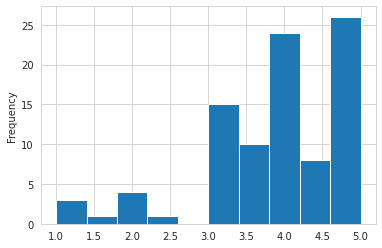

In [442]:
#Mágico de OZ
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

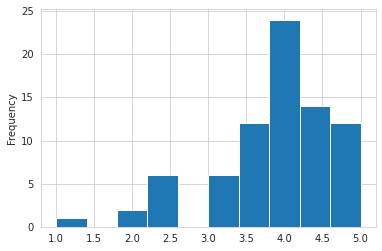

In [439]:
#Little Miss Sunshine
plot_filme(46578)

Como é possível perceber, apesar das médias serem praticamente iguais, a distribuição das notas está diferente.

O importante para analisar este tipo de situação, são alguns fundamentos de estatística, como onde está o 25%, 50% e 75%. Sendo o 50% a mediana.

Apesar da mediana dos dois serem a mesma, os outros dois valores são diferentes.

Um gráfico muito utilizado para fazer esse tipo de medição é o BoxPlot.
Ele será implementado na função para podermos visualizar melhor essas informações.

In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f'id_filme == {n}')['nota']
  notas_do_filme.plot(kind = 'hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

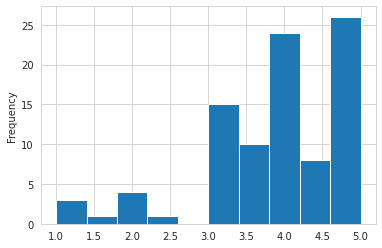

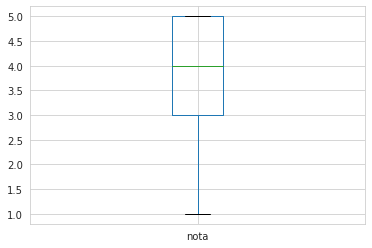

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [444]:
#Mágico de OZ
plot_filme(919)

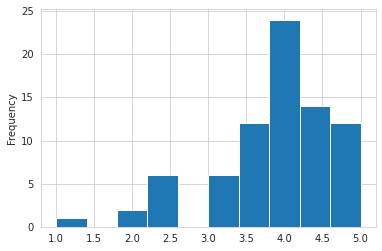

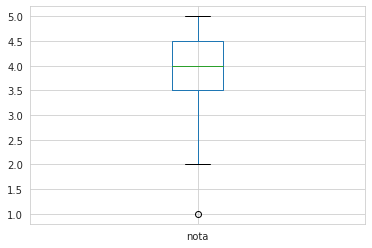

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [446]:
#Little Miss Sunshine
plot_filme(46578)

O gráfico BoxPlot ilustra melhor as informações contidas no ".describe()" A linha verde que o divide representa a mediana. a parte superior da caixa representa o 75%. A parte inferior da caixa representa o 25%, e as linhas além da caixa representam os limites, superiores e inferiores. Estes não necessariamente são iguais ao minimo e máximo.

A pequena bola na parte de baixo do segundo filme representa um "Outlier", ou, um valor atípico, que foge do restante do padrão das avaliações, e pode não representar uma informação consistente.

Para facilitar a comparação, podemos plotar os dois graficos em uma mesma imagem utilizando o seaborn:

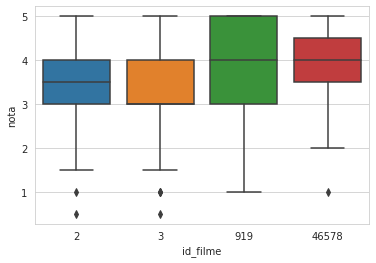

In [449]:
sns.boxplot(data = avaliacoes.query("id_filme in [2,3,919,46578]"), x ="id_filme", y="nota")

Nessa amostra estão sendo comparados os 4 filmes que foram comparados individualmente antes, assim é possível verificar melhor qual a diferença nas avaliações de cada filme, independente da média deles.

#Desafios Aula 02